In [27]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import env
import numpy as np
import nltk
import unicodedata

from wordcloud import WordCloud

# spam data

In [10]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [11]:
# acquire data from spam_db

from env import get_db_url

url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## variables and what they are

- **-words**, all_words = list of strings
- **-freq**,  series revealed in a number count


### Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [12]:
ham_words = clean(' '.join(df[df.label == 'ham']['text']))
spam_words = clean(' '.join(df[df.label == 'spam']['text']))
all_words = clean(' '.join(df['text']))

In [13]:
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [17]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['ham','spam','all']
word_counts.head()

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279


In [31]:
!pip install matplotlib_venn




  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32155 sha256=67280da6fcf55ebae1cc470b74166e69ec010ac6c486180e28d5735cf871477e
  Stored in directory: /Users/naomi-sweatt/Library/Caches/pip/wheels/32/41/5f/d0f29cd092d042d8e8a87d7bbe42193166aa555ff38b377343
Successfully built matplotlib-venn


In [37]:
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


/var/folders/h3/mf3_948d1xn0mgz6l997fvlw0000gn/T/ipykernel_57988/2845592223.py:18: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  plt.gcf().canvas.set_window_title('Fun With Venn Diagrams')  # Set window title


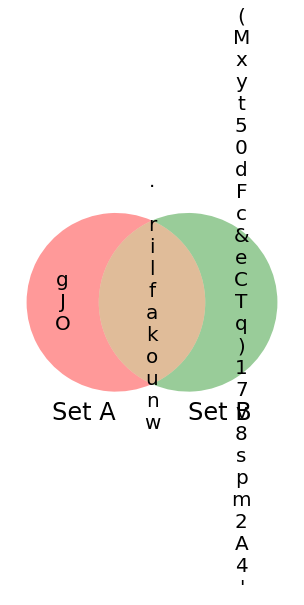

In [38]:
A = set(ham_words.iloc[1].text)
B = set(df.iloc[2].text)

# Create and instance of a venn diagram with 2 areas
diagram = venn2_unweighted([A, B], ("Set A", "Set B"))

# Set text content of areas
diagram.get_label_by_id("10").set_text("\n".join(A - B))
diagram.get_label_by_id("11").set_text("\n".join(A & B))
diagram.get_label_by_id("01").set_text("\n".join(B - A))

# Modify font sizes
for text in diagram.set_labels:
    text.set_fontsize(24)
for text in diagram.subset_labels:
    text.set_fontsize(20)

plt.gcf().canvas.set_window_title('Fun With Venn Diagrams')  # Set window title
plt.show()

/var/folders/h3/mf3_948d1xn0mgz6l997fvlw0000gn/T/ipykernel_57988/2851129661.py:20: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  plt.gcf().canvas.set_window_title('Fun With Venn Diagrams')  # Set window title


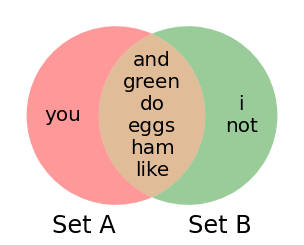

In [34]:
from matplotlib_venn import venn2_unweighted

A = set("Do you like green eggs and ham?".replace("?", "").lower().split())
B = set("I do not like green eggs and ham".lower().split())

# Create and instance of a venn diagram with 2 areas
diagram = venn2_unweighted([A, B], ("Set A", "Set B"))

# Set text content of areas
diagram.get_label_by_id("10").set_text("\n".join(A - B))
diagram.get_label_by_id("11").set_text("\n".join(A & B))
diagram.get_label_by_id("01").set_text("\n".join(B - A))

# Modify font sizes
for text in diagram.set_labels:
    text.set_fontsize(24)
for text in diagram.subset_labels:
    text.set_fontsize(20)

plt.gcf().canvas.set_window_title('Fun With Venn Diagrams')  # Set window title
plt.show()

In [22]:
# making ham bigrams
ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts())

len(ham_bigrams)

30869

In [23]:
# making spam bigrams
spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts())

len(spam_bigrams)

6886

In [24]:
# making bigrams for all words
all_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts())

len(all_bigrams)

37583